# Graph Analysis Techniques without Feature Learning

# Dimensionality reduction with graphs

## Lab 2: Robust PCA

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS6208_codes/codes/labs_lecture03/04_dim_reduc'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd

In [2]:
# Load libraries

# Math
import numpy as np

# Import data
import scipy.io

# Visualization 
%matplotlib inline
#%matplotlib notebook 
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import time

# Import functions in lib folder
import sys
sys.path.insert(0, 'lib/')

# Import helper functions
%load_ext autoreload
%autoreload 2
from lib.utils import shrink
from lib.utils import compute_pca
from lib.utils import compute_pca

# Import
import scipy.sparse.linalg
import time
import scipy.ndimage

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

1000 2


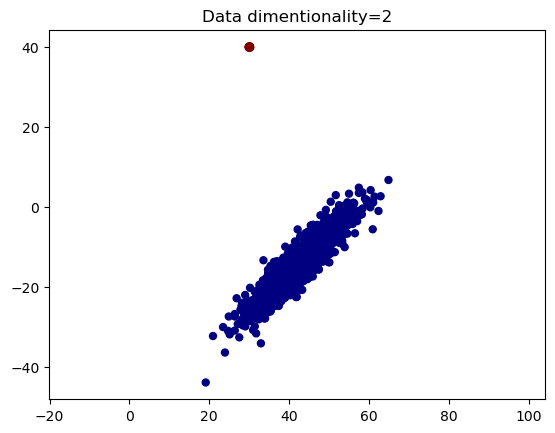

In [3]:
# Data matrix 
mat = scipy.io.loadmat('datasets/ellipsoide_robustpca.mat')
X = mat['X']
Xref = X
n = X.shape[0]
d = X.shape[1]
C_outliers = mat['C_outliers'].squeeze()
print(n,d)

plt.figure(1)
size_vertex_plot = 25
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=C_outliers, color=pyplot.jet())
plt.title('Data dimentionality=' + str(d))
plt.axis('equal')
plt.show()

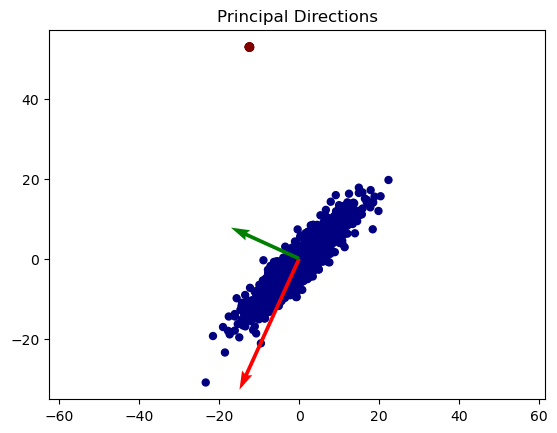

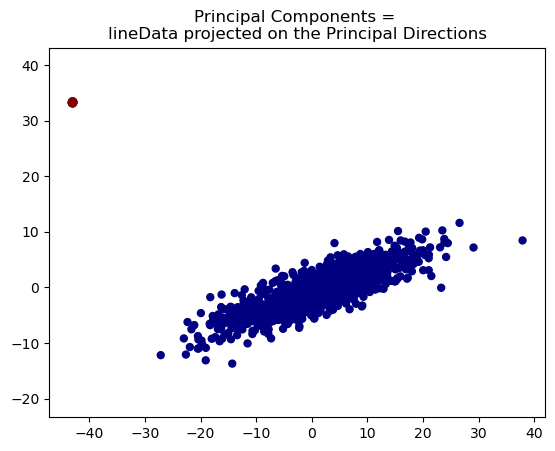

In [4]:
# Run standard PCA
nb_pca = 2
PC,PD,EnPD = compute_pca(X,nb_pca)

# zero-centered data
Xzc = X - np.mean(X,axis=0) 

# Plot
plt.figure(2)
size_vertex_plot = 25
plt.scatter(Xzc[:,0], Xzc[:,1], s=size_vertex_plot*np.ones(n), c=C_outliers, color=pyplot.jet())
k=0; p=3e-4* EnPD[k]* PD[:,k]; p1pca = p
plt.quiver(0.0, 0.0, p[0], p[1], scale=1., units='xy', color='r') 
k=1; p=5e-4* EnPD[k]* PD[:,k]; p2pca = p
plt.quiver(0.0, 0.0, p[0], p[1], scale=1., units='xy', color='g') 
plt.title('Principal Directions')
plt.axis('equal')
plt.show()

plt.figure(3)
size_vertex_plot = 25
plt.scatter(PC[:,0], PC[:,1], s=size_vertex_plot*np.ones(n), c=C_outliers, color=pyplot.jet())
plt.title('Principal Components = \nlineData projected on the Principal Directions')
plt.axis('equal')
plt.show()

<Figure size 640x480 with 0 Axes>

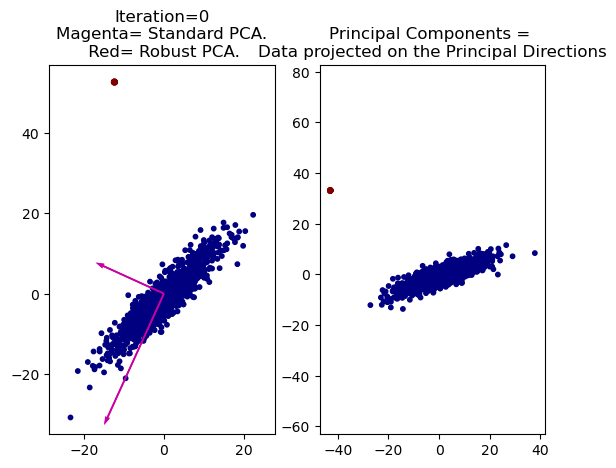

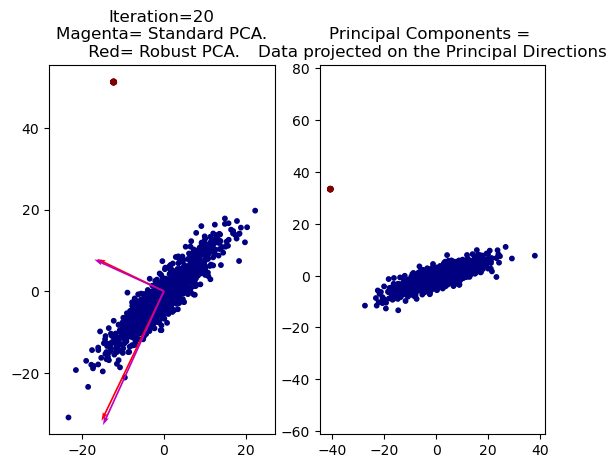

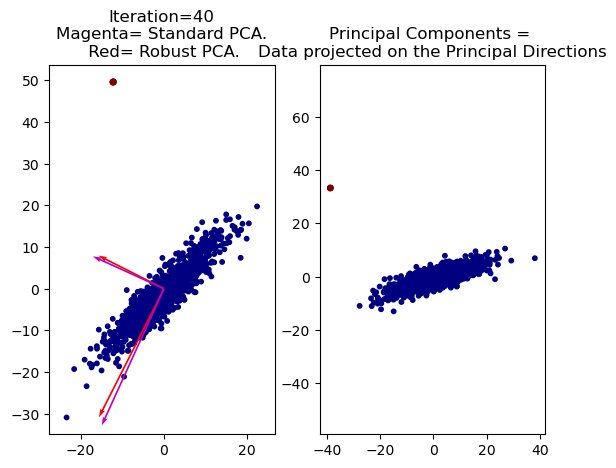

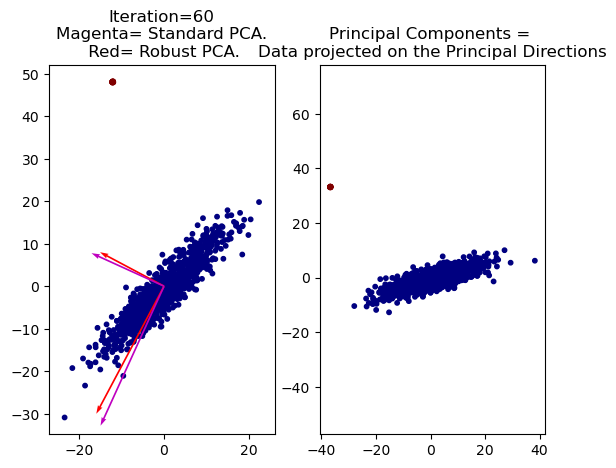

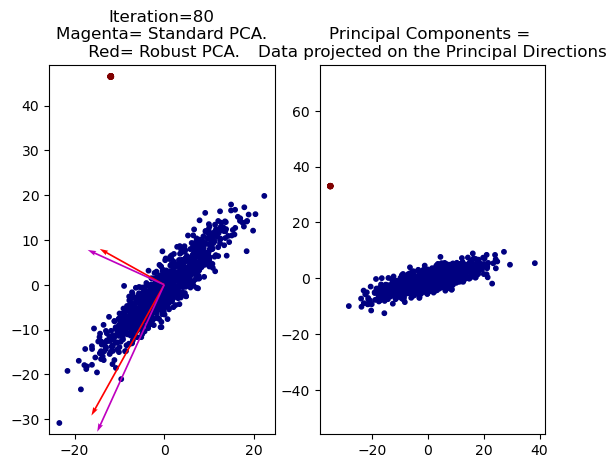

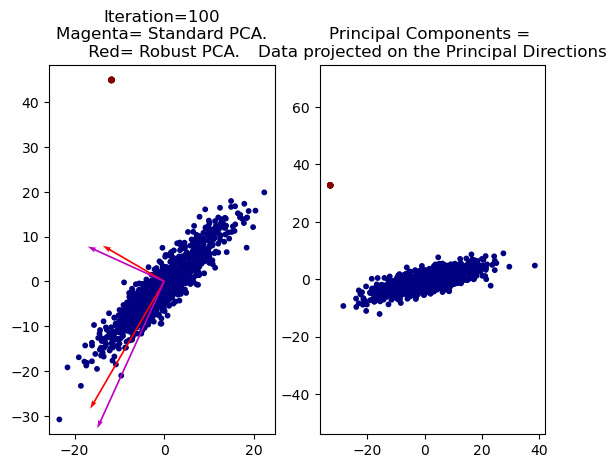

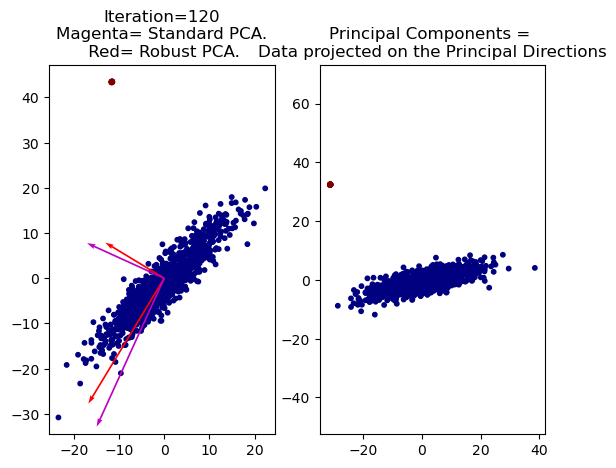

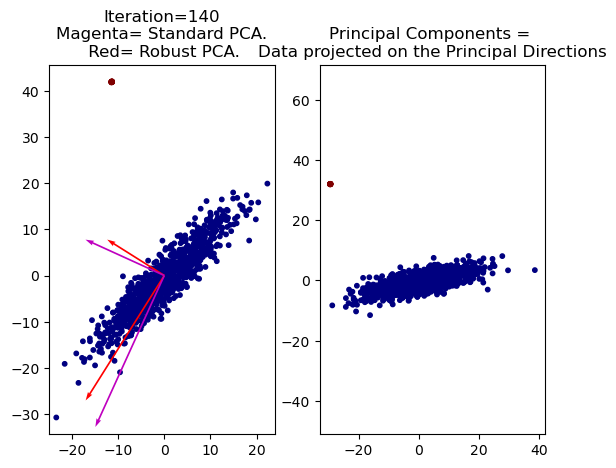

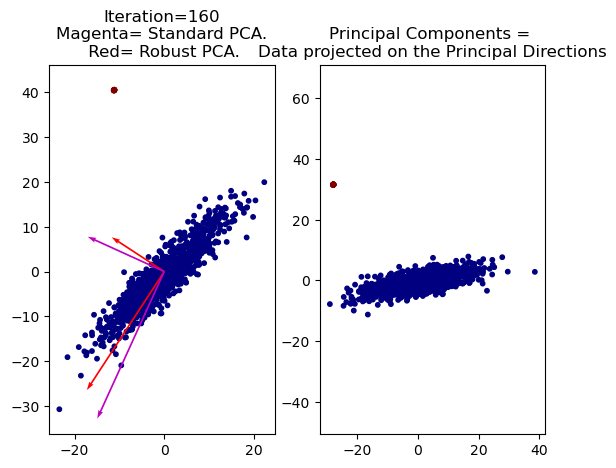

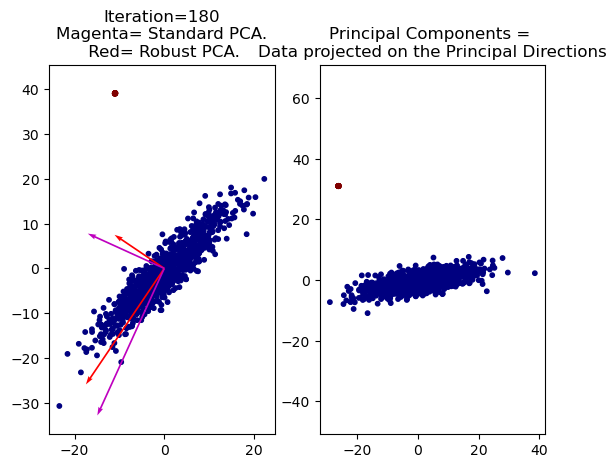

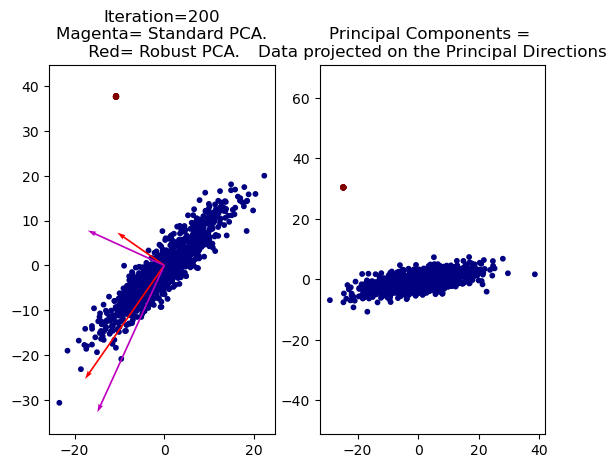

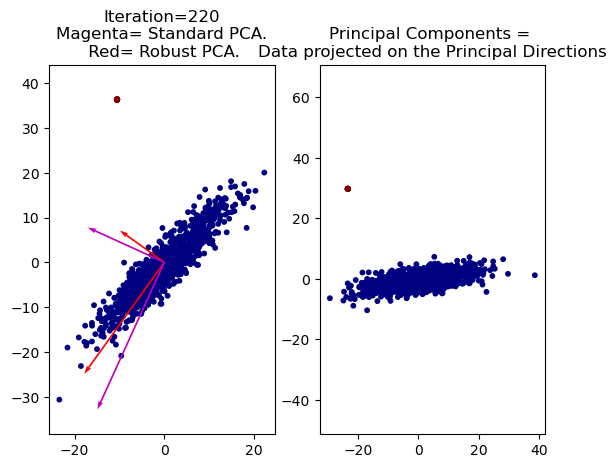

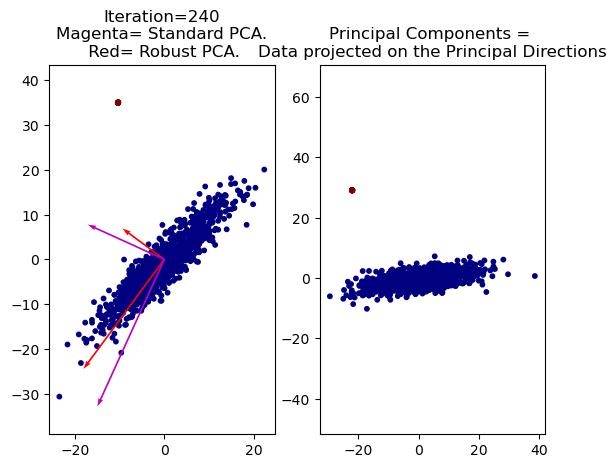

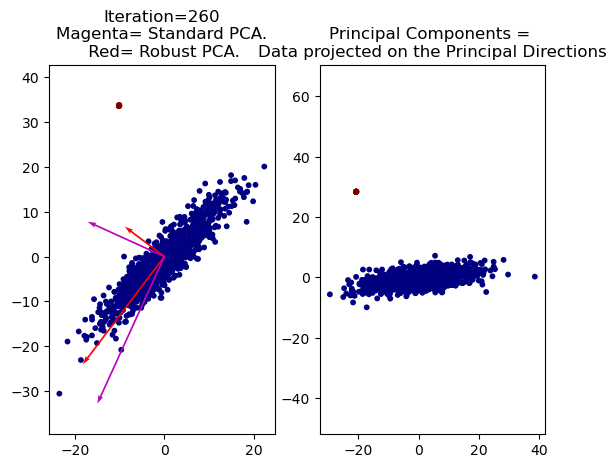

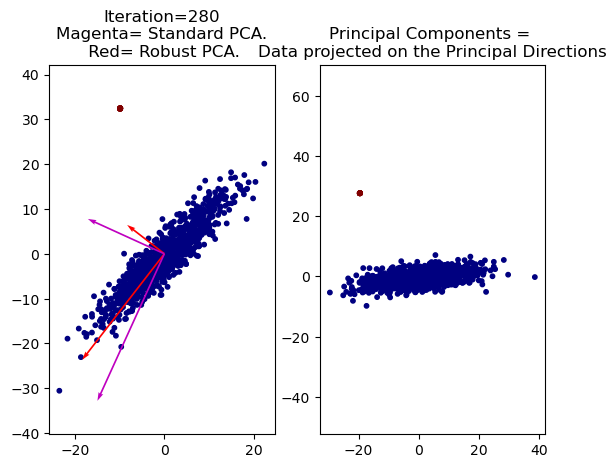

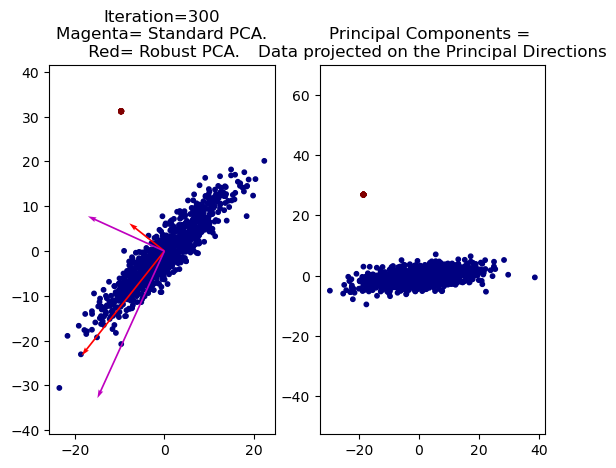

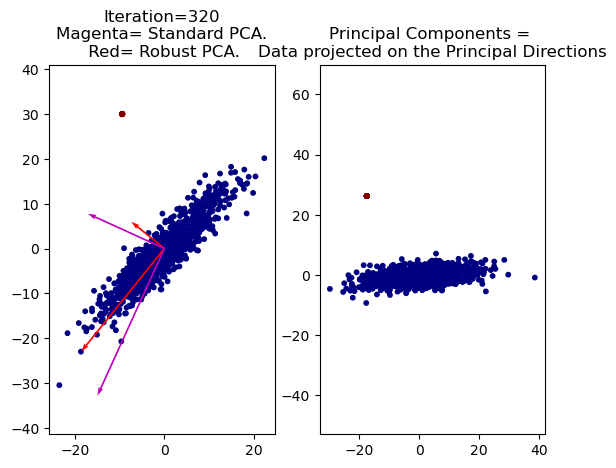

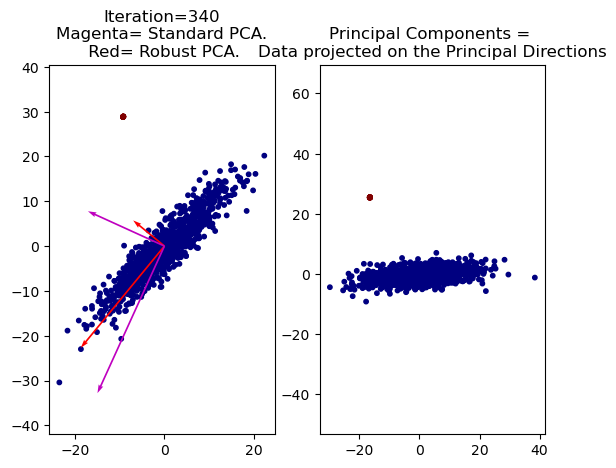

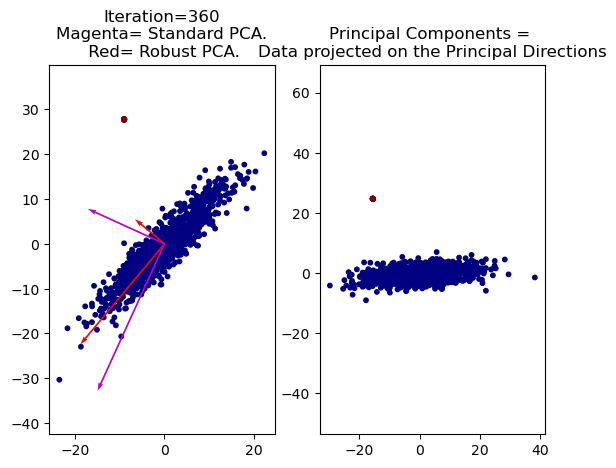

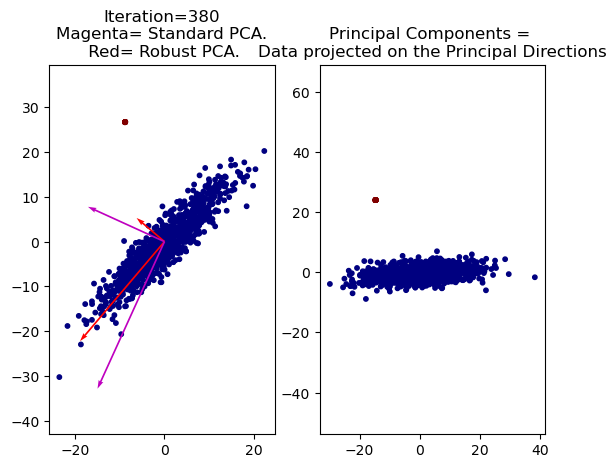

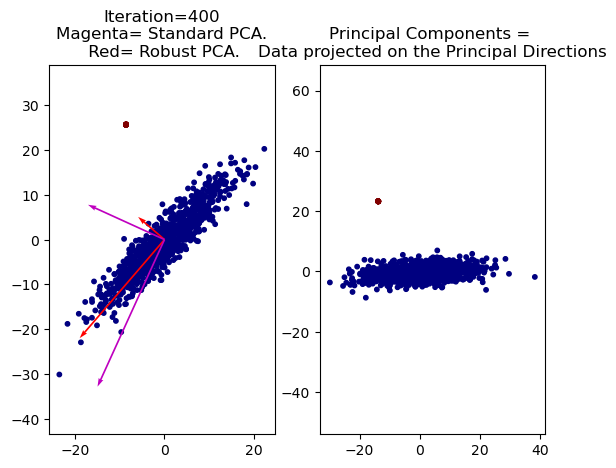

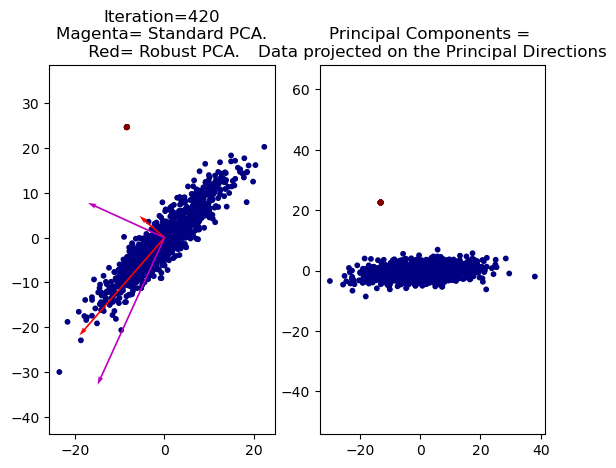

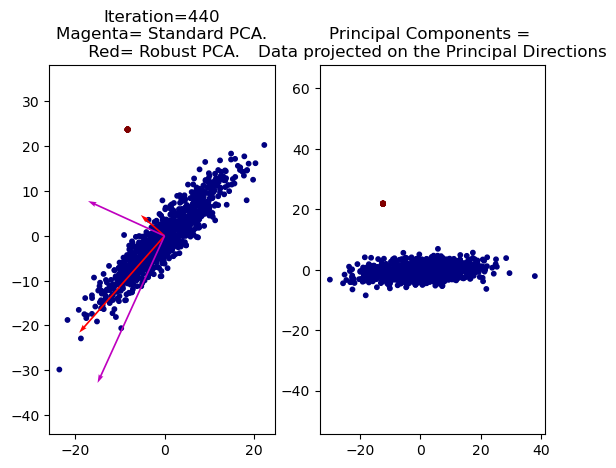

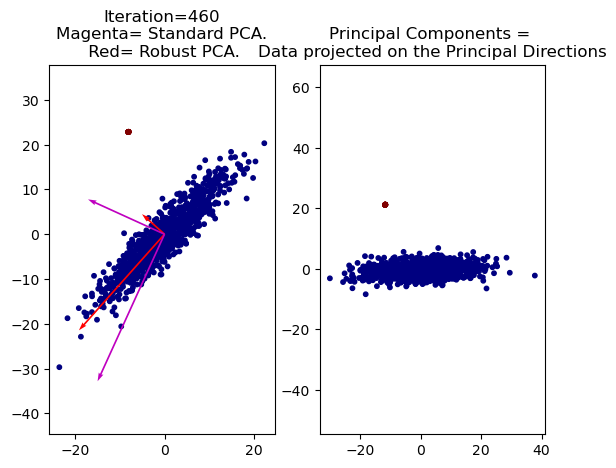

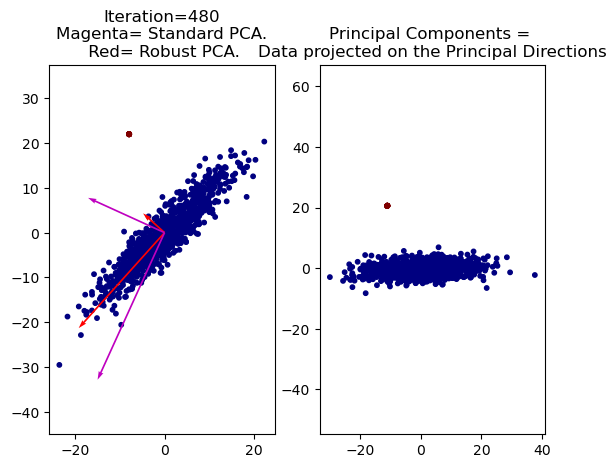

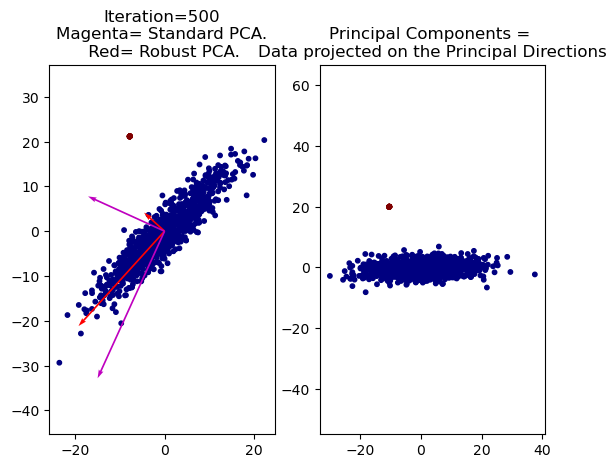

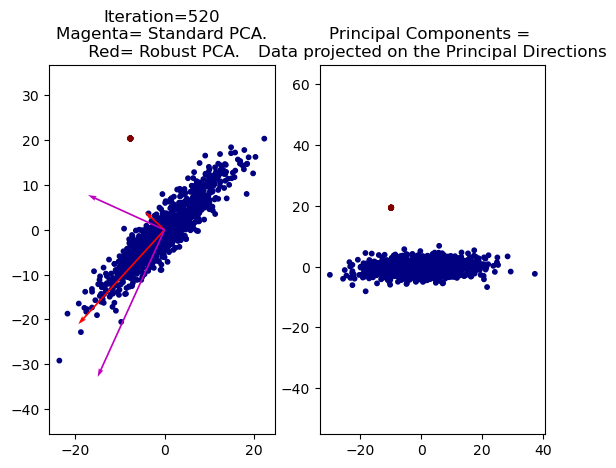

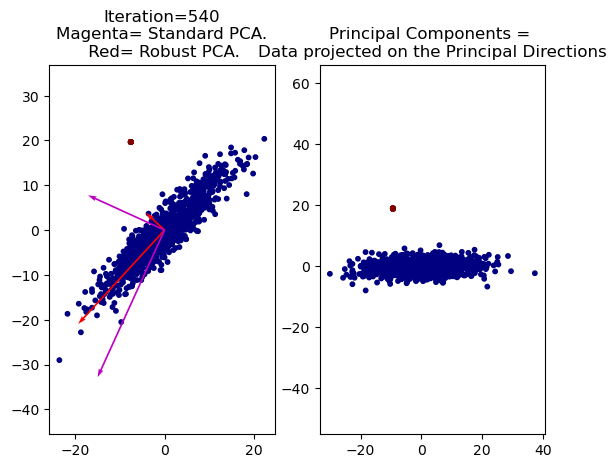

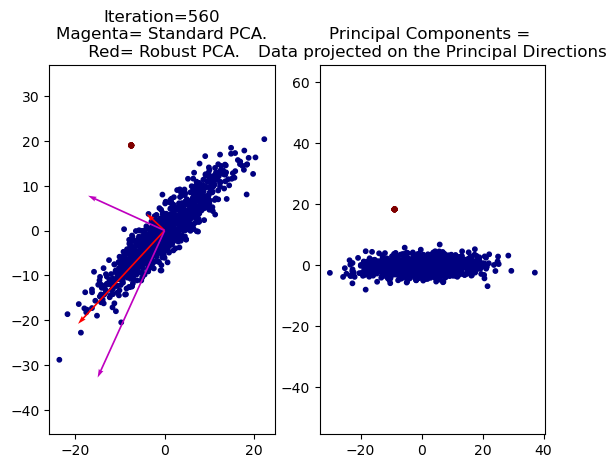

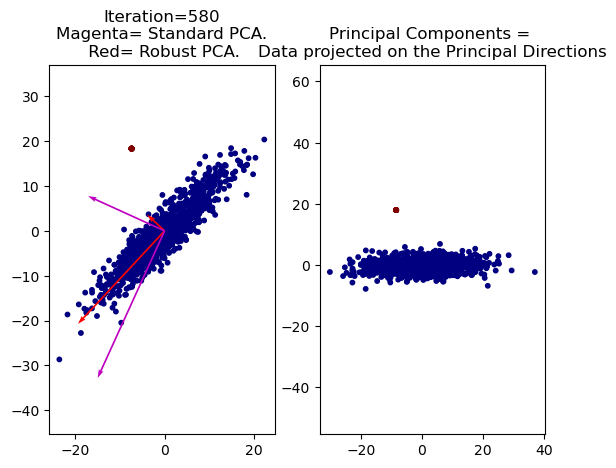

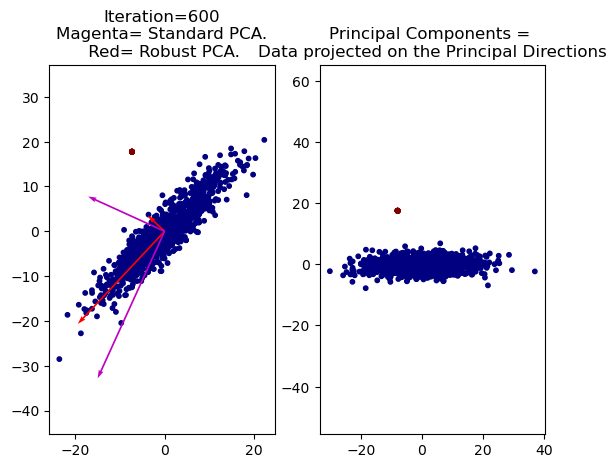

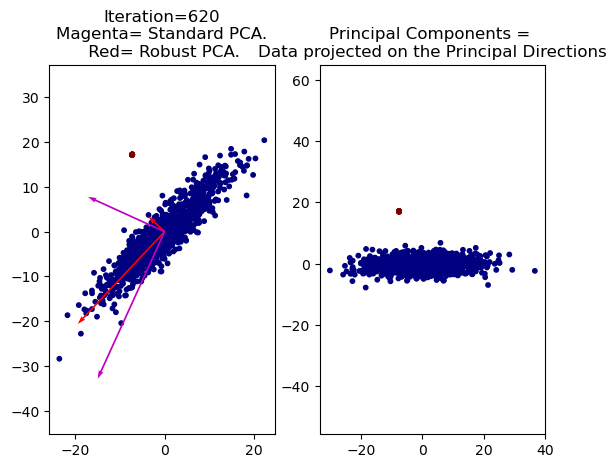

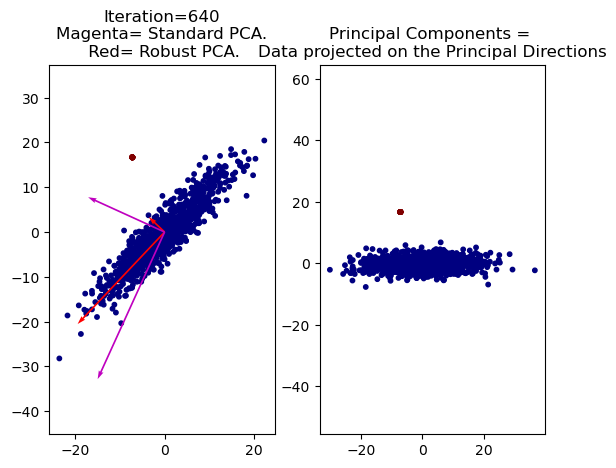

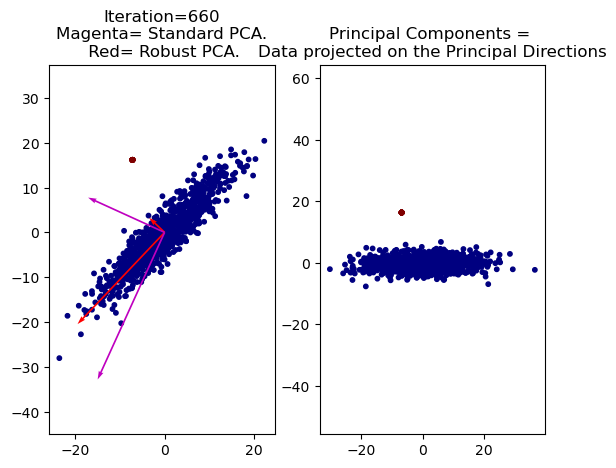

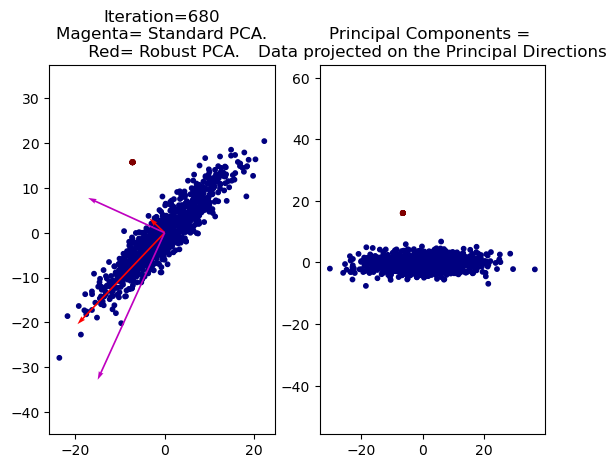

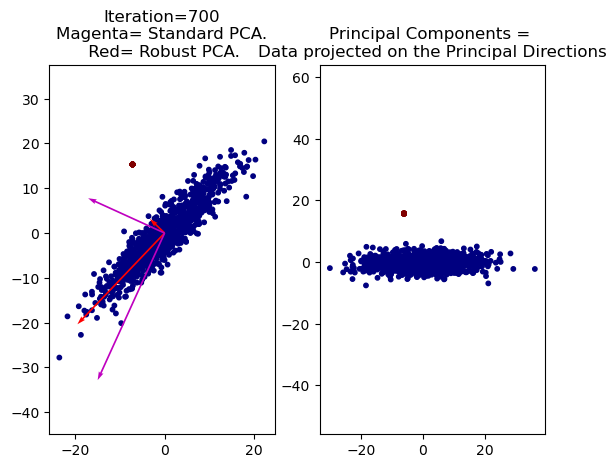

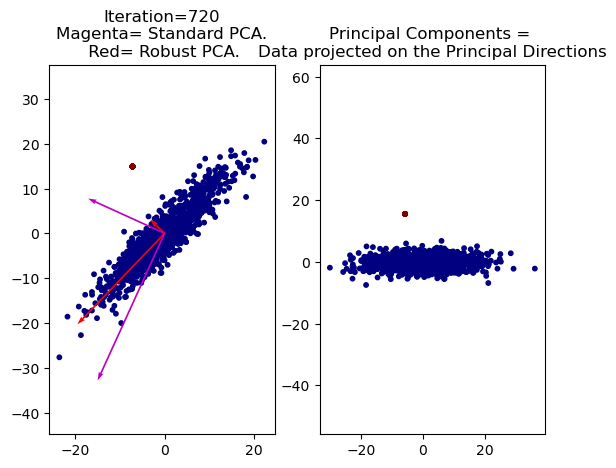

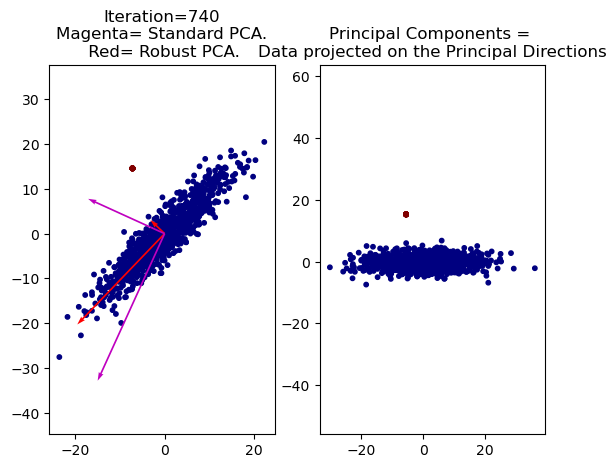

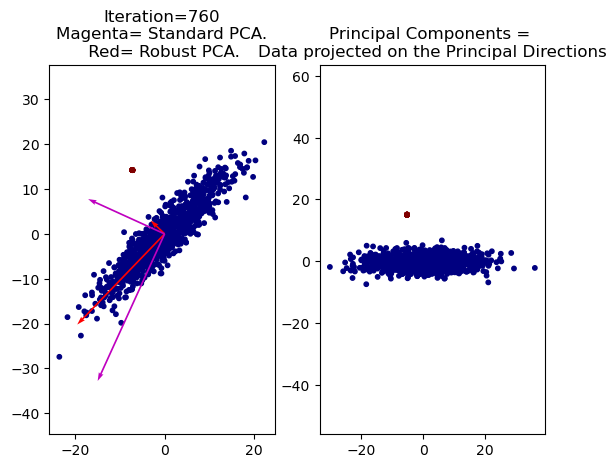

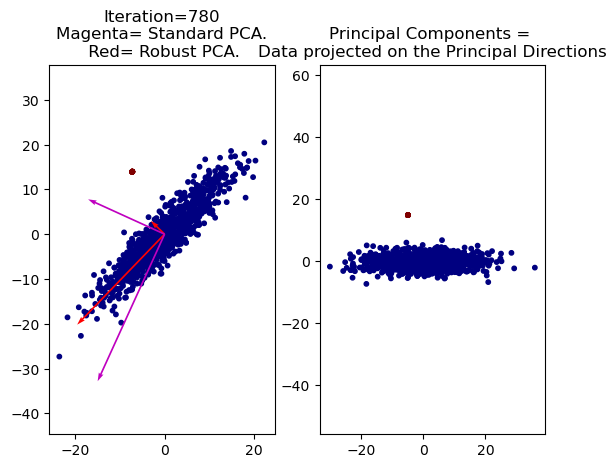

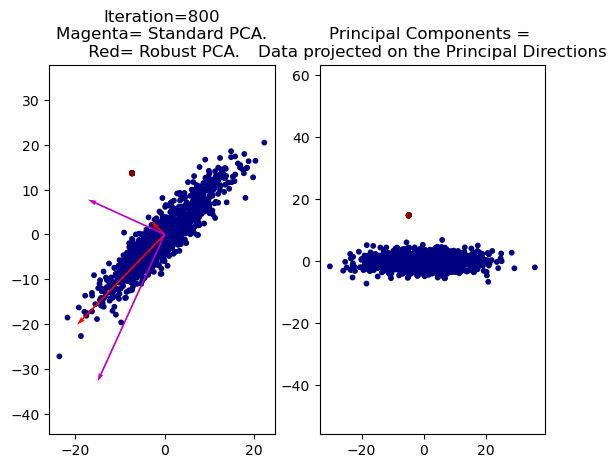

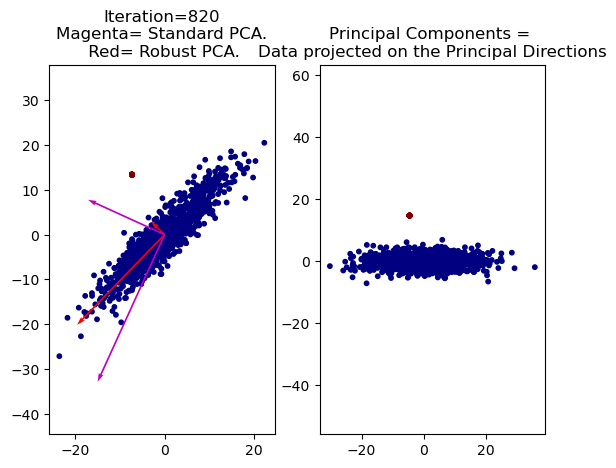

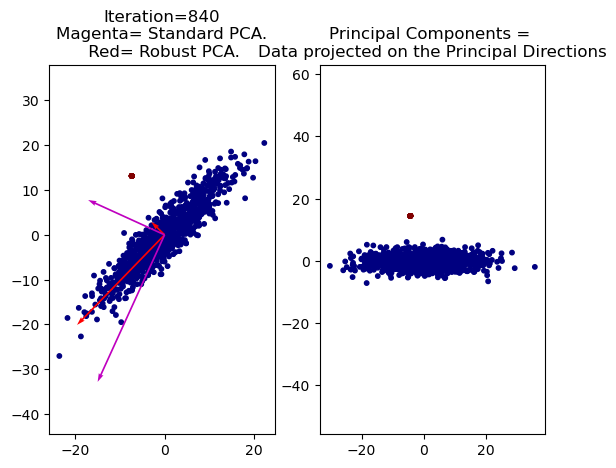

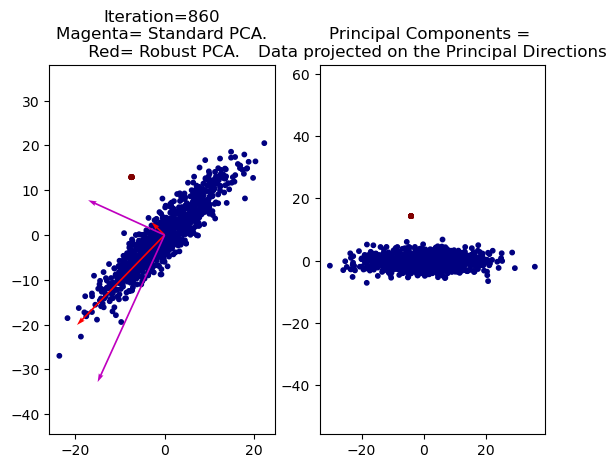

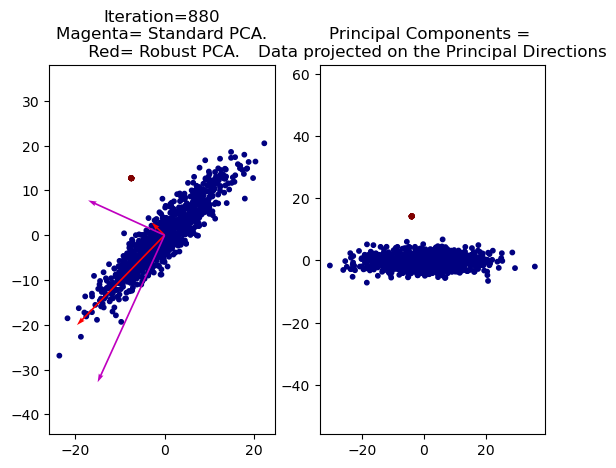

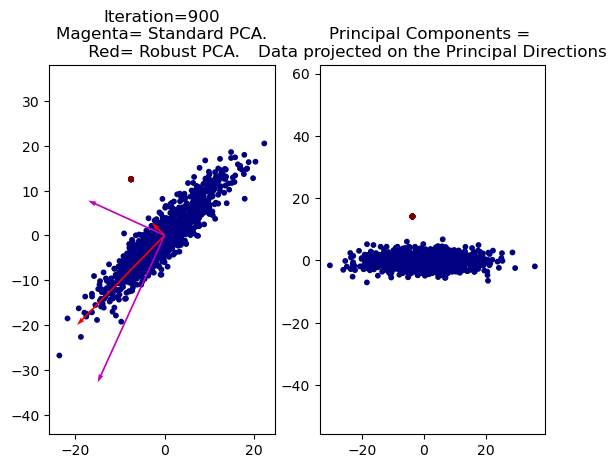

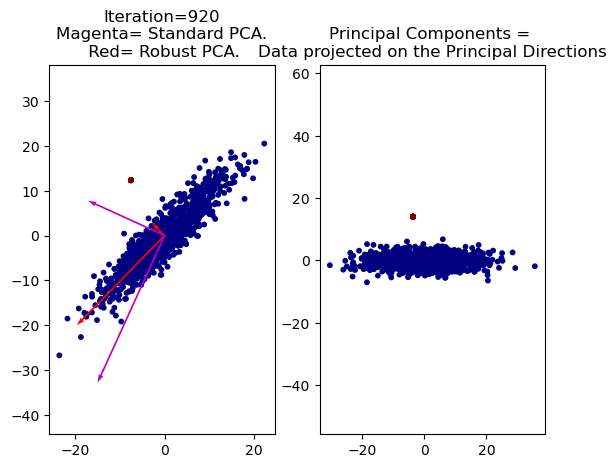

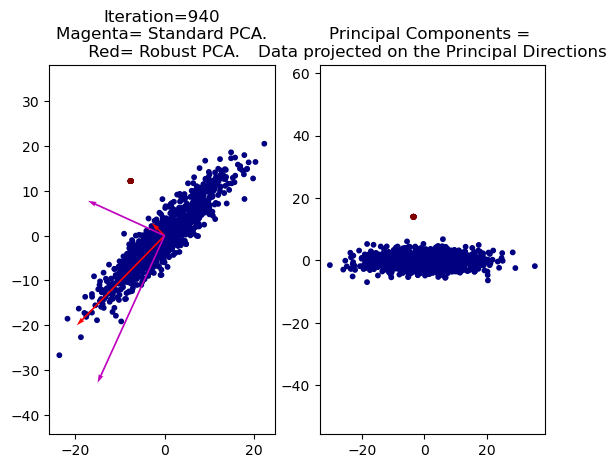

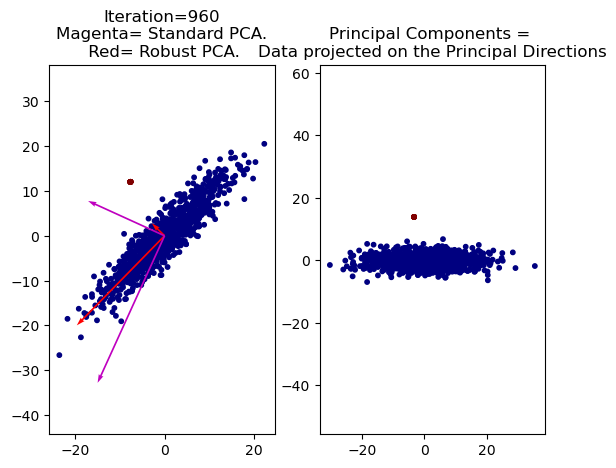

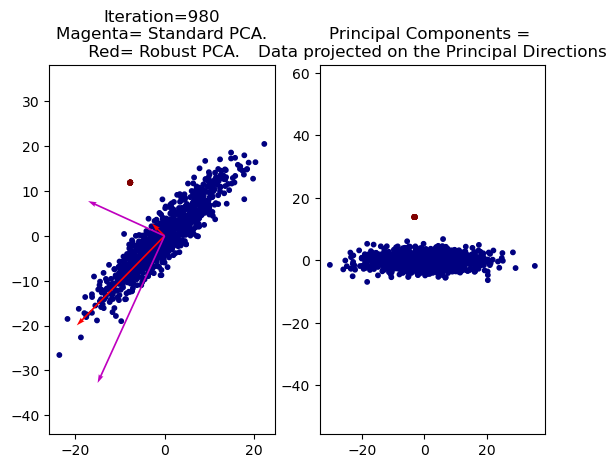

In [5]:
# Plot
fig = plt.figure(4)
fig.canvas.draw()
plt.show(block=False)

# Run Robust PCA
X = Xref - np.mean(Xref,axis=0) 
L = X
S = np.zeros(X.shape)
Z = np.zeros(X.shape)
n,m = X.shape
min_nm = np.min([n,m])
r = 1
lambdaN = 1.
lambdaS = 0.1
for i in range(1000):
    
    # Update L
    Lold = L
    L = X - S + Z/r
    Usvd,Ssvd,Vsvd = np.linalg.svd(L) # L = U*S*V'
    Sdiag = shrink( Ssvd , lambdaN/ r )
    I = np.array(range(min_nm))
    Sshrink = np.zeros([n,m])
    Sshrink[I,I] = Sdiag
    L = Usvd.dot(Sshrink.dot(Vsvd))
       
    # Update S
    Sold = S
    S = X - L + Z/r
    S = shrink( S , lambdaS/ r )
    
    # Update Z
    Z = Z + r* ( X - L - S )
    
    # Diff between two successive iterates
    diffL = np.linalg.norm(L-Lold,'fro')
    diffS = np.linalg.norm(S-Sold,'fro')
    
    # Display
    cpt = 20
    if not(i%cpt):
        
        # Run standard PCA on low-rank part, which is a denoised data matrix
        nb_pca = 2
        X_new = L
        X_new = X_new - np.mean(X_new,axis=0) 
        [PC,PD,EnPD] = compute_pca(X_new,nb_pca)
        
        # Plot
        plt.subplot(121)
        size_vertex_plot = 10
        if (i>=cpt): im1.remove(); im2.remove(); im3.remove(); im4.remove(); im5.remove(); im6.remove(); 
        im1 = plt.scatter(X_new[:,0], X_new[:,1], s=size_vertex_plot*np.ones(n), c=C_outliers, color=pyplot.jet())
        k=0; p=3e-4* EnPD[k]* PD[:,k]; 
        im2 = plt.quiver(0.0, 0.0, p[0], p[1], scale=1., units='xy', color='r') 
        k=1; p=5e-4* EnPD[k]* PD[:,k]; 
        im3 = plt.quiver(0.0, 0.0, p[0], p[1], scale=1., units='xy', color='r') 
        im4 = plt.quiver(0.0, 0.0, p1pca[0], p1pca[1], scale=1., units='xy', color='m') 
        im5 = plt.quiver(0.0, 0.0, p2pca[0], p2pca[1], scale=1., units='xy', color='m') 
        plt.title('Iteration=' + str(i) + '\nMagenta= Standard PCA.\n Red= Robust PCA.')
        plt.axis('equal')
        plt.subplot(122)
        im6 = plt.scatter(PC[:,0], PC[:,1], s=size_vertex_plot*np.ones(n), c=C_outliers, color=pyplot.jet())
        plt.title('Principal Components = \nData projected on the Principal Directions')
        plt.axis('equal')
        plt.show()
        fig.canvas.draw()
        time.sleep(0.1)